# Analysis of Ad-Hoc Communications  Network
This cell shows the libraries that are needed to be imported for the functions below to run. The following libraries and their use-cases are mentioned below:
1. random - This is used to generate towers with random length and breadth.
2. copy - This is used to copy matrices between each other to store previous matrix values.
3. seaborn - This is used for the visualization part of the project.

In [199]:
import random
import seaborn as sns
from copy import copy,deepcopy
import matplotlib.pyplot as plt

# Tower Generation
Package 'random' is used to generate the left bottom coordinates for each tower and its coverage. Based on the input coordinates of the total coverage area, the length and breadth of each tower coverage is generated, making sure that none of the towers cover the whole rectangular bounded region. The generation of coordinates of each tower, including its length and breadth, is taken completely at random from a uniform random distribution, using 'randint' function.

In [200]:
class tower(object):
    '''Class: Tower
    Param: object of type tower
    Param: Co-ordinates of the Rectangular bounded region
    Description: Generates random co-ordinates for a sequence of rectangles'''
    lb1 = 0
    lb2 = 0
    lu1 = 0
    lu2 = 0
    rb1 = 0
    rb2 = 0
    ru1 = 0
    ru2 = 0
    length = 0
    breadth = 0
    def __init__(self,x1,x2,y1,y2):
        self.lb1 = random.randint(x1,x2)                    #left bottom 
        self.lb2 = random.randint(y1,y2)                    #lefth bottom
        if self.lb1 == x1 and self.lb2 == y1:
            self.length = random.randint(1,x2)              #length
            self.breadth = random.randint(1,y2)             #breadth
        else:
            self.length = random.randint(1,x2-self.lb1+1)
            self.breadth = random.randint(1,y2-self.lb2+1)
        self.lu1 = self.lb1                                 #left upper
        self.lu2 = self.lb2 + self.breadth - 1              #left upper
        self.rb1 = self.lb1 + self.length - 1               #right bottom
        self.rb2 = self.lb2                                 #right bottom
        self.ru1 = self.rb1                                 #right upper
        self.ru2 = self.lu2                                 #right upper

# Representation of the Rectangular Coverage Regions
The total coverage area is represented in the form of a matrix. The following represents a rectangular bounded region of length = 11 and breadth = 11:

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

Each element in the matrix represents a coordinate. The value of each element represents which tower coverage it belongs to. The following matrix shows the first tower coverage region at coordinates (4,6),(4,7),(6,6) and (6,7).

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 

[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],

[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],

[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

The following function does the filling up of matrix with appropriate values according to the sequence number of the tower generated. Values of '1' represent the first tower in sequence.

In [201]:
def fill(lb1,lb2,lu1,lu2,rb1,rb2,ru1,ru2,bounded_box,n):
    '''Function: fill
    Param: lb1:ru2 : The coordinates of the tower coverage region
    bounded_box: the rectangular bounded matrix 
    n: sequence number of the tower
    Description: It fills up the rectangular bounded box with values according to the tower sequence number'''
    #print(id(bounded_box))
    i = lb2
    j = lb1
    #print bounded_box
    while i <= lu2:
        j = lb1
        while j <= rb1:
            #print j
            #print i
            bounded_box[i][j] = bounded_box[i][j] + n
            j = j + 1 
        i = i + 1

# Maximum Rectangular Area obtained after trimming
The following algorithm finds the maximum rectangle that is not overlapping with any other rectangular coverage region. 

It returns coordinates of the maximum rectangle which is trimmed from the polygon that is generated by removing the overlapped portion of the current rectangle. The algorithm checks if the element is equal to the 'sequence number' and increments the height for each column in the rectangular bounded box and stores it at the index of the array corresponding to the column number. 

The same algorithm is used to calculate right and left indices. Now, the maximum area is calculated and stored in an iterative process and the coordinates are only stored if the area is found out to be greater than the previous obtained area.

In [202]:
def max_rect(bounded_box,lb1,lb2,rb1,rb2,lu1,lu2,ru1,ru2,sum_bounded_area,num):
    #print id(lb1)
    '''Function: max_rect 
    Param: sum_bounded_area: The Rectangular Bounded Area covered by the towers
           num: Sequence Number of the tower
    Description: Uses an iterative algorithm to calculate the maximum rectangle area among candidate rectangles'''
    m = len(bounded_box)
    #print m
    n = len(bounded_box[0])
    #print n
    left_idx = [0 for i in range(n)]
    right_idx = [n for i in range(n)]
    height = [0 for i in range(n)]
    top_idx = [0 for i in range(n)]
    #print right,top
    maxA = 0
    for i in range(m):
        cord_left = 0
        cord_right = n
        cord_top = 0
        for j in range(n):
            if bounded_box[i][j] == num:
                height[j] = height[j] + 1 
            else:
                height[j] = 0
                top_idx[j] = i + 1
        for j in range(n):
            if bounded_box[i][j] == num:
                left_idx[j] = max(left_idx[j],cord_left)
            else:
                left_idx[j] = 0
                cord_left = j + 1 
        for j in range(n-1,-1,-1):
            if bounded_box[i][j] == num:
                right_idx[j] = min(right_idx[j],cord_right)
            else:
                right_idx[j] = n
                cord_right = j
        for j in range(n):
            maxA = max(maxA,((right_idx[j]-left_idx[j])*height[j]))
            if maxA == (right_idx[j]-left_idx[j])*height[j]:
                lb1 = left_idx[j]
                #print (lb1)
                lb2 = top_idx[j]
                lu1 = left_idx[j]
                lu2 = top_idx[j] + height[j] - 1
                rb1 = right_idx[j] - 1
                rb2 = top_idx[j]
                ru1 = right_idx[j] - 1
                ru2 = top_idx[j] + height[j] - 1             
    sum_bounded_area = sum_bounded_area + maxA
    #print maxA,sum_bounded_area
    #print id(lb1)
    #print (lb1,id(lb1))
    return lb1,lb2,rb1,rb2,lu1,lu2,ru1,ru2,sum_bounded_area

# Main Function 
This is the main function that returns the cumulative coverage area taken up by the sequence of the towers and also the fraction of area covered by the towers relative to the total coverage area of the rectangular bounded area. This function calls all the above defined functions finally generates the final matrix with non-overlapping rectangles.

The function returns a tuple containing 3 elements (coverage area, fraction, final configuration): The first element shows the final coverage area, the second element gives the fraction of coverage area relative to the total rectangular area, and the third element returns the final configuration of the matrix after the trim-down oeprations have been performed.

In [203]:
def ad_hoc(length,breadth,n,plot):
    '''Function: Ad-Hoc
    Param: length: Length of the Rectangular Region
    breadth: Breadth of the Rectangular Region, Number of Towers
    n: Number of Towers
    plot : If plot == 1, then the figure will be plotted.
    Description: This is the main function that generates the final matrix with non-overlapping rectangles and 
    also returns the cumulative coverage area of the towers and the fraction of the total area covered.'''
    assert isinstance(length,int), 'Assertion Error: Length should be an integer'
    assert isinstance(breadth,int), 'Assertion Error: Breadth should be an integer'
    assert isinstance(n,int), 'Assertion Error: n should be an integer'
    assert isinstance(plot,int), 'Assertion Error: plot should be an integer'
    assert length > 1, 'Assertion Error: Length is not greater than 1'
    assert breadth > 1, 'Assertion Error: Breadth is not greater than 1'
    
    bounded_box = [[0 for y in range(length)] for x in range(breadth)]
    draw_matrix = deepcopy(bounded_box)
    i = 1
    total_area = length*breadth
    sum_bounded_area = 0
    sum_bounded_box = 0
    #colors = [(0,0,0)]
    while i <= n and float(sum_bounded_area)/(length*breadth) != 1.0:
        #print(bounded_box)
        prev_bound = deepcopy(bounded_box)
        #print(prev_bound)
        while sum_bounded_box == 0:
            bounded_box = deepcopy(prev_bound)
            #print('Prev ',bounded_box)
            rect_tower = tower(0,length-1,0,breadth-1)
            fill(rect_tower.lb1,rect_tower.lb2,rect_tower.lu1,rect_tower.lu2,rect_tower.rb1,rect_tower.rb2,rect_tower.ru1,rect_tower.ru2,bounded_box,i)
            #print(bounded_box)
            for j in bounded_box:
                for k in j:
                    if k != i:
                        bounded_box[bounded_box.index(j)][j.index(k)] = 0
            #print(bounded_box)
            sum_bounded_box = sum(map(sum,bounded_box))
        #print(bounded_box)
        #print(prev_bound)
        if sum(map(sum,bounded_box)) != 0:
            fill(rect_tower.lb1,rect_tower.lb2,rect_tower.lu1,rect_tower.lu2,rect_tower.rb1,rect_tower.rb2,rect_tower.ru1,rect_tower.ru2,draw_matrix,i)
            sum_bounded_box = 0
            lb1_n = 0
            lb2_n = 0
            rb1_n = 0
            rb2_n = 0
            lu1_n = 0
            lu2_n = 0
            ru1_n = 0
            ru2_n = 0
            #print (id(lb1_n))
            lb1_n,lb2_n,rb1_n,rb2_n,lu1_n,lu2_n,ru1_n,ru2_n,sum_bounded_area = max_rect(bounded_box,lb1_n,lb2_n,rb1_n,rb2_n,lu1_n,lu2_n,ru1_n,ru2_n,sum_bounded_area,i)
            #print(lb1_n,lb2_n,rb1_n,rb2_n,lu1_n,lu2_n,ru1_n,ru2_n,sum_bounded_area)
            fill(lb1_n,lb2_n,lu1_n,lu2_n,rb1_n,rb2_n,ru1_n,ru2_n,prev_bound,i)
        bounded_box = deepcopy(prev_bound)
        #print(bounded_box)
        #print tmp_box
        i = i + 1
    if plot == 1:
        sns.set()
        sns.heatmap(draw_matrix)
    return float(sum_bounded_area),float(sum_bounded_area)/(length*breadth),bounded_box

# Testing and Visualization
The test below plots a heatmap showing a visual representation of what the algorithm returns as output. 
The First figure plots the overlapping rectangles. The Second figure plots the trimmed down rectangles and the final configuration. 

The numbers which correlate to each color bar represent the sequence numbers of the rectangles. For example, '1' corresponds to the first rectangle that enters, '2' corresponds to the second and so on. The overlapping regions are also represented. If the n-th tower and the (n+1)-th tower overlap, the overlapping region is represented by the color corresponding to the value 'n + (n+1)'. For example for 3 towers, if '1' and '3' overlap, the overlapping region will have a value of 4. And if '2' and '3' also overlap, the overlapping region will have a value of 5. And if all the three overlap, the overlapping region will have a value of 1+2+3 = 6, and it will be represented by a color corresponding to number 6.

Also, it answers questions 

Note: The two cells below maybe executed multiple times to generate different combinations of towers and also the length,breadth and the number of towers maybe changed.

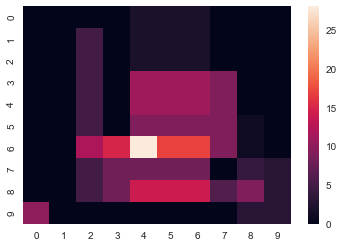

In [204]:
l = ad_hoc(10,10,10,1) #Length,Breadth,Number of Towers,Plot(==1, figure is plotted)

The Final Coverage area =  45.0
Fraction of Coverage Area =  0.45


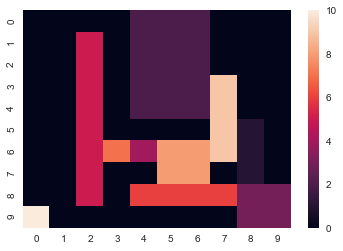

In [205]:
import seaborn as sns
sns.set()
sns.heatmap(l[2])
print('The Final Coverage area = ',l[0])
print('Fraction of Coverage Area = ',l[1])

# Function for Finding out the average number of Towers required to cover the whole region
The function defined below finds out and returns the average number of towers required to cover a given rectangular area. 

I also plot a scatter graph showing the average number of towers required for a particular area. The average is also printed out in the form of a dictionary along with the corresponding area as its key.

In [206]:
def find_avg(length,breadth,iterations):
    '''Function: find_avg
    Param: length : The Length of the total rectangular region
    breadth: The breadth of the total rectangular region
    iterations: The number of iterations till which the whole program will run'''
    assert isinstance(length,int), 'Assertion Error: Length should be an integer'
    assert isinstance(breadth,int), 'Assertion Error: Breadth should be an integer'
    assert isinstance(iterations,int), 'Assertion Error: Iterations should be an integer'
    b = 0
    n = 1
    sum = 0
    for i in range(iterations):
        n = 1
        #print i
        b = 0
        while b != 1:
            #print b,n
            b = ad_hoc(length,breadth,n,0)[1]
            n = n + 1
            #print(n)
            #print(b)
        #print n 
        sum = sum + n
    return int(sum/iterations)

In [207]:
def scatter_plot():
    '''Function: Scatter_Plot
    Description: It plots a scatter plot for area vs avg. number of communication towers -> with area ranging from 20 to 90'''
    avg_num = []
    area = []
    length = [10,11,12,13,14,15]
    breadth = [2,3,4,5,6]
    for i in length:
        for j in breadth:
            avg = find_avg(i,j,100)
            avg_num.append(avg)
            area.append(i*j)
    plt.scatter(area,avg_num)
    plt.show()
    return area,avg_num

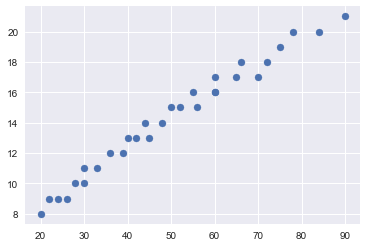

The avg. number of communication towers required =  {20: 8, 30: 10, 40: 13, 50: 15, 60: 16, 22: 9, 33: 11, 44: 14, 55: 16, 66: 18, 24: 9, 36: 12, 48: 14, 72: 18, 26: 9, 39: 12, 52: 15, 65: 17, 78: 20, 28: 10, 42: 13, 56: 15, 70: 17, 84: 20, 45: 13, 75: 19, 90: 21}


In [208]:
x = scatter_plot()
print('The avg. number of communication towers required = ',dict(zip(x[0],x[1])))